缺失值：
   - 删除 成列删除/成对删除
   - 均值、模型、中值填充
   - 预测模型填充
   
异常值：
   - 删除
   - 转换 log减轻极值引起的变化
   - 填充 人为异常值可填充
   - 区别对待 两个模型
 
 

# 特征工程

# 数据预处理与特征处理

数据采集、数据清洗、数据采样

## pivot

In [ ]:
def api_pivot_count_features(df):
    tmp = df.groupby(['file_id','api'])['tid'].count().to_frame('api_tid_count').reset_index()
    tmp_pivot = pd.pivot_table(data=tmp,index = 'file_id',columns='api',values='api_tid_count',fill_value=0)
    tmp_pivot.columns = [tmp_pivot.columns.names[0] + '_pivot_'+ str(col) for col in tmp_pivot.columns]
    tmp_pivot.reset_index(inplace = True)
    tmp_pivot = memory_process._memory_process(tmp_pivot)
    return tmp_pivot 

## 标准化

In [33]:
# 标准化
# 将特征转换为标准正态分布，并和整体样本分布有关
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
iris = load_iris()
#标准化，返回值为标准化后的数据
StandardScaler().fit_transform(iris.data).shape

(150, 4)

## 区间缩放

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler().fit_transform(iris.data)

## 归一化

In [ ]:
# 归一化
# 归一化是将样本的特征值转换到同一量纲下，把数据映射到[0,1]或[a,b]区间内，仅由变量极值决定
from sklearn.preprocessing import Normalizer
#归一化，返回值为归一化后的数据
Normalizer().fit_transform(iris.data)

归一化与标准化的使用场景：
    
    如果对输出结果范围有要求，则用归一化
    如果数据较为稳定，不存在极端的最大值或最小值，则用归一化
    如果数据存在异常值和较多噪音，则用标准化，这样可以通过中心化简介避免异常值和极端值的影响
    SVM\KNN\PCA 等模型都必须进行归一化或标准化
  

## 区间缩放法

In [ ]:
# 区间缩放法
from sklearn.preprocessing import MinMaxScaler
#区间缩放，返回值为缩放到[0, 1]区间的数据
MinMaxScaler().fit_transform(iris.data)


## 定量特征二值化

In [ ]:
from sklearn.preprocessing import Binarizer
#二值化，阈值设置为3，返回值为二值化后的数据
Binarizer(threshold=3).fit_transform(iris.data)

## 哑编码,就是one-hot

In [17]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
#哑编码，对IRIS数据集的目标值，返回值为哑编码后的数据
#target原本(150,1),共有0，1，2三个值，变换后成(150,3)
data = OneHotEncoder(categories='auto',sparse=False,dtype=np.int).fit_transform(iris.target.reshape((-1,1)))

## 缺失值处理

In [11]:
iris.data.shape

(150, 4)

In [15]:
from numpy import vstack ,array,nan
from sklearn.impute import SimpleImputer
#missing_values=nan,缺失表示形式为Nan。strategy="mean"，采取的填充策略是均值。还有其他参数
SimpleImputer(missing_values=nan,strategy="mean").fit_transform(vstack((array([nan,nan,nan,nan]),iris.data))).shape

(151, 4)

## 多项式变换

In [ ]:
#转换带平方的
from sklearn.preprocessing import PolynomialFeatures
#多项式转换
#参数degree为度，默认值为2 
PolynomialFeatures(degree=2).fit_transform(iris.data)

In [34]:
#转换取log
import numpy as np
#自定义单元数据转换
from sklearn.preprocessing import FunctionTransformer

FunctionTransformer(np.log1p,validate=False).fit_transform(iris.data)

(150, 4)

# 特征降维

## 方差选择法

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
iris = load_iris()
#方差选择法，返回值为特征选择后的数据
#参数threshold为方差的阈值
VarianceThreshold(threshold=3).fit_transform(iris.data)

## 相关系数法

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
from array import array
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
#选择K个最好的特征，返回选择特征后的数据
#第一个参数为计算评估特征是否好的函数，该函数输入特征矩阵和目标向量，输出二元组（评分，P值）的数组，数组第i项为第i个特征的评分和P值。在此定义为计算相关系数
#参数k为选择的特征个数
SelectKBest(
    lambda X, Y: np.array(list(map(lambda x: pearsonr(x, Y), X.T))).T[0],
    k=2).fit_transform(iris.data, iris.target)

## 卡方检验

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#选择K个最好的特征，返回选择特征后的数据
SelectKBest(chi2, k=2).fit_transform(iris.data, iris.target)

## 互信息法

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest 
from minepy import MINE 
 
#由于MINE的设计不是函数式的，定义mic方法将其为函数式的，返回一个二元组，二元组的第2项设置成固定的P值0.5 
def mic(x, y): 
    m = MINE() 
    m.compute_score(x, y) 
    return (m.mic(), 0.5) 

#选择K个最好的特征，返回特征选择后的数据 
SelectKBest(
    lambda X, Y: np.array(list(map(lambda x: mic(x, Y), X.T))).T[0],
    k=2).fit_transform(iris.data, iris.target)

## 递归特征消除法RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#递归特征消除法，返回特征选择后的数据
#参数estimator为基模型
#参数n_features_to_select为选择的特征个数
RFE(estimator=LogisticRegression(multi_class='auto',
                                 solver='lbfgs',
                                 max_iter=500),
    n_features_to_select=2).fit_transform(iris.data, iris.target)

## 基于惩罚项的特征选择法

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

#带L1惩罚项的逻辑回归作为基模型的特征选择
SelectFromModel(
    LogisticRegression(penalty='l2', C=0.1, solver='lbfgs',
                       multi_class='auto')).fit_transform(
                           iris.data, iris.target)

## 基于树模型的特征选择法

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
 
# GBDT作为基模型的特征选择
SelectFromModel(GradientBoostingClassifier()).fit_transform(iris.data,
                                                            iris.target)

## 主成分分析法

In [ ]:
from sklearn.decomposition import PCA
 
#主成分分析法，返回降维后的数据
#参数n_components为主成分数目
PCA(n_components=2).fit_transform(iris.data)

In [ ]:
from sklearn.decomposition import PCA   #主成分分析法

#保持90%的信息
pca = PCA(n_components=0.9)
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_90 = pca.transform(test_data_scaler)
new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)
new_train_pca_90['target'] = train_data_scaler['target']
new_train_pca_90.describe()

## 线性判别分析法

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
 
#线性判别分析法，返回降维后的数据
#参数n_components为降维后的维数
LDA(n_components=2).fit_transform(iris.data, iris.target)

# 赛题特征工程

## 异常值分析

### 绘制各个特征的箱线图

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [54]:
train_data = pd.read_csv('./zhengqi_train.txt',sep='\t',encoding='utf-8')
test_data  = pd.read_csv('./zhengqi_test.txt', sep='\t',encoding='utf-8')

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


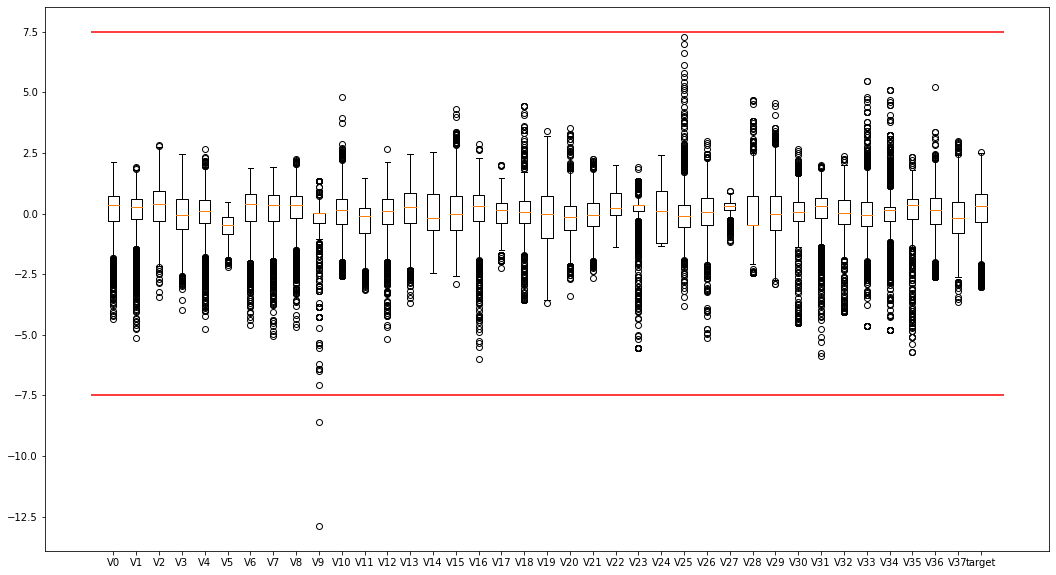

In [59]:
plt.figure(figsize=(18, 10))
plt.boxplot(x=train_data.values,labels=train_data.columns)
plt.hlines([-7.5,7.5], 0, 40, colors='r')
plt.show()

In [ ]:
# 删除异常值
train_data = train_data[train_data['V9']>-7.5]
test_data = test_data[test_data['V9']>-7.5]

## 最大值和最小值的归一化

In [60]:
from sklearn import preprocessing

features_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns
train_data_scaler['target'] = train_data['target']

print(train_data_scaler.describe())
print(test_data_scaler.describe())

                V0           V1           V2           V3           V4  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.690528     0.735521     0.593745     0.606301     0.639876   
std       0.143747     0.133738     0.145844     0.151302     0.119550   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.625465     0.695419     0.497279     0.515165     0.586328   
50%       0.727076     0.766264     0.609155     0.609933     0.652940   
75%       0.783922     0.812642     0.694342     0.714174     0.712185   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V5           V6           V7           V8           V9  ...  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  ...   
mean      0.607801     0.735418     0.741337     0.702012     0.894246  ...   
std       0.193919     0.141872     0.137111     0.129082     0.067047  ...   
min       0.00000

## 画热力图

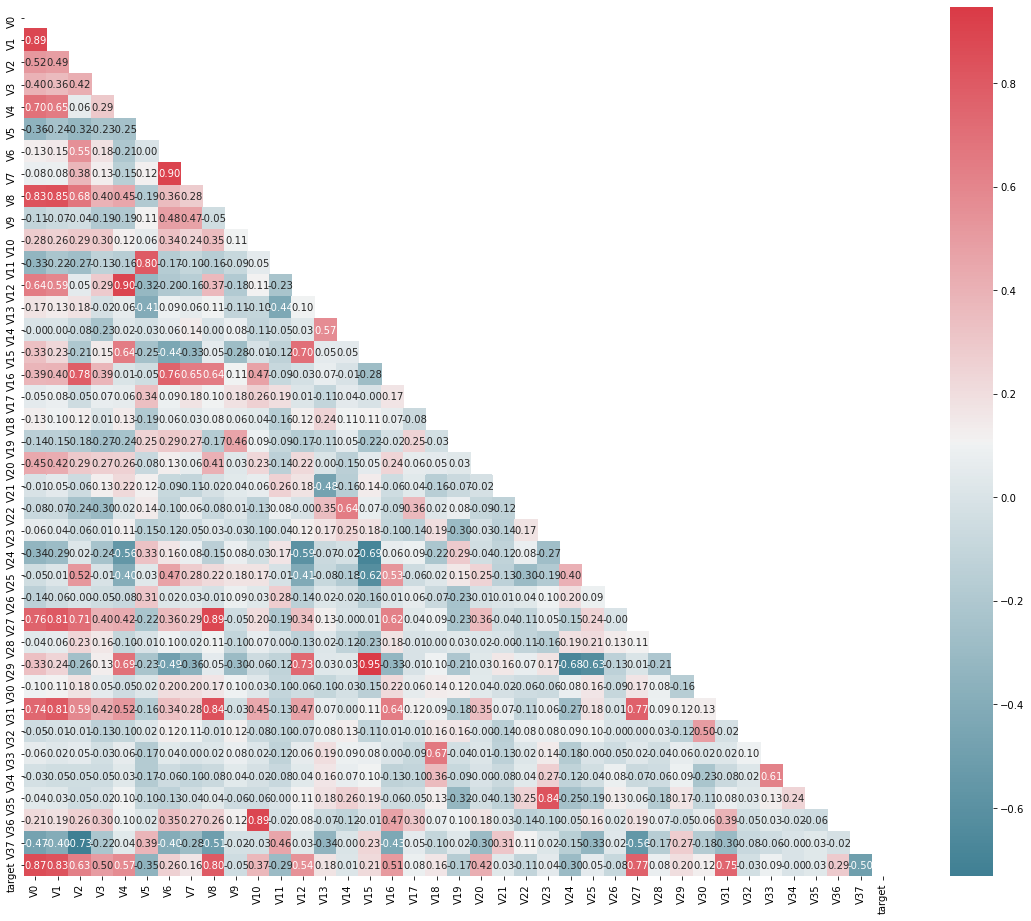

In [71]:
plt.figure(figsize=(20,16))
column = train_data_scaler.columns.tolist()
mcorr = train_data_scaler[column].corr(method="spearman") #{'pearson', 'kendall', 'spearman'}
mask = np.zeros_like(mcorr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #上三角矩阵置为True
cmap = sns.diverging_palette(220,10,as_cmap=True)
g = sns.heatmap(mcorr,mask= mask,cmap=cmap,square=True,annot=True,fmt="0.2f")
plt.show()

## 特征降维

In [75]:
mcorr = mcorr.abs()
numerical_corr = mcorr[mcorr['target']>0.1]['target']
print(numerical_corr.sort_values(ascending=False))

(27,)


In [80]:
train_data_scaler[mcorr[mcorr['target']>0.1]["target"].index].shape

(2888, 27)

# stacking特征

## stacking回归特征

In [ ]:
"""
-- 回归
-- stacking 回归特征
"""
def stacking_reg(clf,train_x,train_y,test_x,clf_name,kf,label_split=None):
    train=np.zeros((train_x.shape[0],1))
    test=np.zeros((test_x.shape[0],1))
    test_pre=np.empty((folds,test_x.shape[0],1))
    cv_scores=[]
    for i,(train_index,test_index) in enumerate(kf.split(train_x,label_split)):       
        tr_x=train_x[train_index]
        tr_y=train_y[train_index]
        te_x=train_x[test_index]
        te_y = train_y[test_index]
        if clf_name in ["rf","ada","gb","et","lr"]:
            clf.fit(tr_x,tr_y)
            pre=clf.predict(te_x).reshape(-1,1)
            train[test_index]=pre
            test_pre[i,:]=clf.predict(test_x).reshape(-1,1)
            cv_scores.append(mean_squared_error(te_y, pre))
        elif clf_name in ["xgb"]:
            train_matrix = clf.DMatrix(tr_x, label=tr_y, missing=-1)
            test_matrix = clf.DMatrix(te_x, label=te_y, missing=-1)
            z = clf.DMatrix(test_x, label=te_y, missing=-1)
            params = {'booster': 'gbtree',
                      'eval_metric': 'rmse',
                      'gamma': 1,
                      'min_child_weight': 1.5,
                      'max_depth': 5,
                      'lambda': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'eta': 0.03,
                      'tree_method': 'exact',
                      'seed': 2017,
                      'nthread': 12
                      }
            num_round = 10000
            early_stopping_rounds = 100
            watchlist = [(train_matrix, 'train'),
                         (test_matrix, 'eval')
                         ]
            if test_matrix:
                model = clf.train(params, train_matrix, num_boost_round=num_round,evals=watchlist,
                                  early_stopping_rounds=early_stopping_rounds
                                  )
                pre= model.predict(test_matrix,ntree_limit=model.best_ntree_limit).reshape(-1,1)
                train[test_index]=pre
                test_pre[i, :]= model.predict(z, ntree_limit=model.best_ntree_limit).reshape(-1,1)
                cv_scores.append(mean_squared_error(te_y, pre))

        elif clf_name in ["lgb"]:
            train_matrix = clf.Dataset(tr_x, label=tr_y)
            test_matrix = clf.Dataset(te_x, label=te_y)
            params = {
                      'boosting_type': 'gbdt',
                      'objective': 'regression_l2',
                      'metric': 'mse',
                      'min_child_weight': 1.5,
                      'num_leaves': 2**5,
                      'lambda_l2': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'learning_rate': 0.03,
                      'tree_method': 'exact',
                      'seed': 2017,
                      'nthread': 12,
                      'silent': True,
                      }
            num_round = 10000
            early_stopping_rounds = 100
            if test_matrix:
                model = clf.train(params, train_matrix,num_round,valid_sets=test_matrix,
                                  early_stopping_rounds=early_stopping_rounds
                                  )
                pre= model.predict(te_x,num_iteration=model.best_iteration).reshape(-1,1)
                train[test_index]=pre
                test_pre[i, :]= model.predict(test_x, num_iteration=model.best_iteration).reshape(-1,1)
                cv_scores.append(mean_squared_error(te_y, pre))
        else:
            raise IOError("Please add new clf.")
        print("%s now score is:"%clf_name,cv_scores)
    test[:]=test_pre.mean(axis=0)
    print("%s_score_list:"%clf_name,cv_scores)
    print("%s_score_mean:"%clf_name,np.mean(cv_scores))
    return train.reshape(-1,1),test.reshape(-1,1)

def rf_reg(x_train, y_train, x_valid, kf, label_split=None):
    randomforest = RandomForestRegressor(n_estimators=600, max_depth=20, n_jobs=-1, random_state=2017, max_features="auto",verbose=1)
    rf_train, rf_test = stacking_reg(randomforest, x_train, y_train, x_valid, "rf", kf, label_split=label_split)
    return rf_train, rf_test,"rf_reg"

def ada_reg(x_train, y_train, x_valid, kf, label_split=None):
    adaboost = AdaBoostRegressor(n_estimators=30, random_state=2017, learning_rate=0.01)
    ada_train, ada_test = stacking_reg(adaboost, x_train, y_train, x_valid, "ada", kf, label_split=label_split)
    return ada_train, ada_test,"ada_reg"

def gb_reg(x_train, y_train, x_valid, kf, label_split=None):
    gbdt = GradientBoostingRegressor(learning_rate=0.04, n_estimators=100, subsample=0.8, random_state=2017,max_depth=5,verbose=1)
    gbdt_train, gbdt_test = stacking_reg(gbdt, x_train, y_train, x_valid, "gb", kf, label_split=label_split)
    return gbdt_train, gbdt_test,"gb_reg"

def et_reg(x_train, y_train, x_valid, kf, label_split=None):
    extratree = ExtraTreesRegressor(n_estimators=600, max_depth=35, max_features="auto", n_jobs=-1, random_state=2017,verbose=1)
    et_train, et_test = stacking_reg(extratree, x_train, y_train, x_valid, "et", kf, label_split=label_split)
    return et_train, et_test,"et_reg"

def lr_reg(x_train, y_train, x_valid, kf, label_split=None):
    lr_reg=LinearRegression(n_jobs=-1)
    lr_train, lr_test = stacking_reg(lr_reg, x_train, y_train, x_valid, "lr", kf, label_split=label_split)
    return lr_train, lr_test, "lr_reg"

def xgb_reg(x_train, y_train, x_valid, kf, label_split=None):
    xgb_train, xgb_test = stacking_reg(xgboost, x_train, y_train, x_valid, "xgb", kf, label_split=label_split)
    return xgb_train, xgb_test,"xgb_reg"

def lgb_reg(x_train, y_train, x_valid, kf, label_split=None):
    lgb_train, lgb_test = stacking_reg(lightgbm, x_train, y_train, x_valid, "lgb", kf, label_split=label_split)
    return lgb_train, lgb_test,"lgb_reg"

## stacking 分类特征

In [ ]:
"""
-- 分类
-- stacking 分类特征
"""
def stacking_clf(clf,train_x,train_y,test_x,clf_name,kf,label_split=None):
    train=np.zeros((train_x.shape[0],1))
    test=np.zeros((test_x.shape[0],1))
    test_pre=np.empty((folds,test_x.shape[0],1))
    cv_scores=[]
    for i,(train_index,test_index) in enumerate(kf.split(train_x,label_split)):       
        tr_x=train_x[train_index]
        tr_y=train_y[train_index]
        te_x=train_x[test_index]
        te_y = train_y[test_index]

        if clf_name in ["rf","ada","gb","et","lr","knn","gnb"]:
            clf.fit(tr_x,tr_y)
            pre=clf.predict_proba(te_x)
            
            train[test_index]=pre[:,0].reshape(-1,1)
            test_pre[i,:]=clf.predict_proba(test_x)[:,0].reshape(-1,1)
            
            cv_scores.append(log_loss(te_y, pre[:,0].reshape(-1,1)))
        elif clf_name in ["xgb"]:
            train_matrix = clf.DMatrix(tr_x, label=tr_y, missing=-1)
            test_matrix = clf.DMatrix(te_x, label=te_y, missing=-1)
            z = clf.DMatrix(test_x, label=te_y, missing=-1)
            params = {'booster': 'gbtree',
                      'objective': 'multi:softprob',
                      'eval_metric': 'mlogloss',
                      'gamma': 1,
                      'min_child_weight': 1.5,
                      'max_depth': 5,
                      'lambda': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'eta': 0.03,
                      'tree_method': 'exact',
                      'seed': 2017,
                      "num_class": 2
                      }

            num_round = 10000
            early_stopping_rounds = 100
            watchlist = [(train_matrix, 'train'),
                         (test_matrix, 'eval')
                         ]
            if test_matrix:
                model = clf.train(params, train_matrix, num_boost_round=num_round,evals=watchlist,
                                  early_stopping_rounds=early_stopping_rounds
                                  )
                pre= model.predict(test_matrix,ntree_limit=model.best_ntree_limit)
                train[test_index]=pre[:,0].reshape(-1,1)
                test_pre[i, :]= model.predict(z, ntree_limit=model.best_ntree_limit)[:,0].reshape(-1,1)
                cv_scores.append(log_loss(te_y, pre[:,0].reshape(-1,1)))
        elif clf_name in ["lgb"]:
            train_matrix = clf.Dataset(tr_x, label=tr_y)
            test_matrix = clf.Dataset(te_x, label=te_y)
            params = {
                      'boosting_type': 'gbdt',
                      #'boosting_type': 'dart',
                      'objective': 'multiclass',
                      'metric': 'multi_logloss',
                      'min_child_weight': 1.5,
                      'num_leaves': 2**5,
                      'lambda_l2': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'learning_rate': 0.03,
                      'tree_method': 'exact',
                      'seed': 2017,
                      "num_class": 2,
                      'silent': True,
                      }
            num_round = 10000
            early_stopping_rounds = 100
            if test_matrix:
                model = clf.train(params, train_matrix,num_round,valid_sets=test_matrix,
                                  early_stopping_rounds=early_stopping_rounds
                                  )
                pre= model.predict(te_x,num_iteration=model.best_iteration)
                train[test_index]=pre[:,0].reshape(-1,1)
                test_pre[i, :]= model.predict(test_x, num_iteration=model.best_iteration)[:,0].reshape(-1,1)
                cv_scores.append(log_loss(te_y, pre[:,0].reshape(-1,1)))
        else:
            raise IOError("Please add new clf.")
        print("%s now score is:"%clf_name,cv_scores)
    test[:]=test_pre.mean(axis=0)
    print("%s_score_list:"%clf_name,cv_scores)
    print("%s_score_mean:"%clf_name,np.mean(cv_scores))
    return train.reshape(-1,1),test.reshape(-1,1)

def rf_clf(x_train, y_train, x_valid, kf, label_split=None):
    randomforest = RandomForestClassifier(n_estimators=1200, max_depth=20, n_jobs=-1, random_state=2017, max_features="auto",verbose=1)
    rf_train, rf_test = stacking_clf(randomforest, x_train, y_train, x_valid, "rf", kf, label_split=label_split)
    return rf_train, rf_test,"rf"

def ada_clf(x_train, y_train, x_valid, kf, label_split=None):
    adaboost = AdaBoostClassifier(n_estimators=50, random_state=2017, learning_rate=0.01)
    ada_train, ada_test = stacking_clf(adaboost, x_train, y_train, x_valid, "ada", kf, label_split=label_split)
    return ada_train, ada_test,"ada"

def gb_clf(x_train, y_train, x_valid, kf, label_split=None):
    gbdt = GradientBoostingClassifier(learning_rate=0.04, n_estimators=100, subsample=0.8, random_state=2017,max_depth=5,verbose=1)
    gbdt_train, gbdt_test = stacking_clf(gbdt, x_train, y_train, x_valid, "gb", kf, label_split=label_split)
    return gbdt_train, gbdt_test,"gb"

def et_clf(x_train, y_train, x_valid, kf, label_split=None):
    extratree = ExtraTreesClassifier(n_estimators=1200, max_depth=35, max_features="auto", n_jobs=-1, random_state=2017,verbose=1)
    et_train, et_test = stacking_clf(extratree, x_train, y_train, x_valid, "et", kf, label_split=label_split)
    return et_train, et_test,"et"

def xgb_clf(x_train, y_train, x_valid, kf, label_split=None):
    xgb_train, xgb_test = stacking_clf(xgboost, x_train, y_train, x_valid, "xgb", kf, label_split=label_split)
    return xgb_train, xgb_test,"xgb"

def lgb_clf(x_train, y_train, x_valid, kf, label_split=None):
    xgb_train, xgb_test = stacking_clf(lightgbm, x_train, y_train, x_valid, "lgb", kf, label_split=label_split)
    return xgb_train, xgb_test,"lgb"

def gnb_clf(x_train, y_train, x_valid, kf, label_split=None):
    gnb=GaussianNB()
    gnb_train, gnb_test = stacking_clf(gnb, x_train, y_train, x_valid, "gnb", kf, label_split=label_split)
    return gnb_train, gnb_test,"gnb"

def lr_clf(x_train, y_train, x_valid, kf, label_split=None):
    logisticregression=LogisticRegression(n_jobs=-1,random_state=2017,C=0.1,max_iter=200)
    lr_train, lr_test = stacking_clf(logisticregression, x_train, y_train, x_valid, "lr", kf, label_split=label_split)
    return lr_train, lr_test, "lr"

def knn_clf(x_train, y_train, x_valid, kf, label_split=None):
    kneighbors=KNeighborsClassifier(n_neighbors=200,n_jobs=-1)
    knn_train, knn_test = stacking_clf(kneighbors, x_train, y_train, x_valid, "lr", kf, label_split=label_split)
    return knn_train, knn_test, "knn"

In [ ]:
# 获取数据
features_columns = [c for c in all_data_test.columns if c not in ['label', 'prob', 'seller_path', 'cat_path', 'brand_path', 'action_type_path', 'item_path', 'time_stamp_path']]
x_train = all_data_test[~all_data_test['label'].isna()][features_columns].values
y_train = all_data_test[~all_data_test['label'].isna()]['label'].values
x_valid = all_data_test[all_data_test['label'].isna()][features_columns].values

#  处理函数值inf以及nan情况
def get_matrix(data):
    where_are_nan = np.isnan(data)
    where_are_inf = np.isinf(data)
    data[where_are_nan] = 0
    data[where_are_inf] = 0
    return data

x_train = np.float_(get_matrix(np.float_(x_train)))
y_train = np.int_(y_train)
x_valid = x_train

In [ ]:
# 导入划分数据函数 设stacking特征为5折
from sklearn.model_selection import StratifiedKFold, KFold
folds = 5
seed = 1
kf = KFold(n_splits=5, shuffle=True, random_state=0)


# 使用lgb和xgb分类模型构造stacking特征

# clf_list = [lgb_clf, xgb_clf, lgb_reg, xgb_reg]
# clf_list_col = ['lgb_clf', 'xgb_clf', 'lgb_reg', 'xgb_reg']
clf_list = [lgb_clf, xgb_clf]
clf_list_col = ['lgb_clf', 'xgb_clf']

In [ ]:
# 训练模型，获取stacking特征

clf_list = clf_list
column_list = []
train_data_list=[]
test_data_list=[]
for clf in clf_list:
    train_data,test_data,clf_name=clf(x_train, y_train, x_valid, kf, label_split=None)
    train_data_list.append(train_data)
    test_data_list.append(test_data)
train_stacking = np.concatenate(train_data_list, axis=1)
test_stacking = np.concatenate(test_data_list, axis=1)

In [ ]:
# 原始特征和stacking特征合并
train = pd.DataFrame(np.concatenate([x_train, train_stacking], axis=1))
test = np.concatenate([x_valid, test_stacking], axis=1)

# 特征重命名
df_train_all = pd.DataFrame(train)
df_train_all.columns = features_columns + clf_list_col
df_test_all = pd.DataFrame(test)
df_test_all.columns = features_columns + clf_list_col

In [ ]:
# 获取数据ID以及特征标签LABEL
df_train_all['user_id'] = all_data_test[~all_data_test['label'].isna()]['user_id']
df_test_all['user_id'] = all_data_test[all_data_test['label'].isna()]['user_id']
df_train_all['label'] = all_data_test[~all_data_test['label'].isna()]['label']

In [ ]:
# 训练数据和测试数据保存
df_train_all.to_csv('train_all.csv',header=True,index=False)
df_test_all.to_csv('test_all.csv',header=True,index=False)

# 特征选择

在机器学习和统计学中，特征选择（英语：feature selection）也被称为变量选择、属性选择 或变量子集选择 。它是指：为了构建模型而选择相关特征（即属性、指标）子集的过程。使用特征选择技术有三个原因：

    简化模型，使之更易于被研究人员或用户理解，
    缩短训练时间，
    改善通用性、降低过拟合（即降低方差）。

要使用特征选择技术的关键假设是：训练数据包含许多冗余 或无关 的特征，因而移除这些特征并不会导致丢失信息。 冗余 或无关 特征是两个不同的概念。如果一个特征本身有用，但如果这个特征与另一个有用特征强相关，且那个特征也出现在数据中，那么这个特征可能就变得多余。
特征选择技术与特征提取有所不同。特征提取是从原有特征的功能中创造新的特征，而特征选择则只返回原有特征中的子集。 特征选择技术的常常用于许多特征但样本（即数据点）相对较少的领域。特征选择应用的典型用例包括：解析书面文本和微阵列数据，这些场景下特征成千上万，但样本只有几十到几百个。

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def feature_selection(train, train_sel, target):
    clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0, n_jobs=-1)
    
    scores = cross_val_score(clf, train, target, cv=5)
    scores_sel = cross_val_score(clf, train_sel, target, cv=5)
    
    print("No Select Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))     
    print("Features Select Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### 删除方差较小的要素（方法一）
VarianceThreshold是一种简单的基线特征选择方法。它会删除方差不符合某个阈值的所有要素。默认情况下，它会删除所有零方差要素，即在所有样本中具有相同值的要素。

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel = sel.fit(train)
train_sel = sel.transform(train)
test_sel = sel.transform(test)
print('训练数据未特征筛选维度', train.shape)
print('训练数据特征筛选维度后', train_sel.shape)

In [ ]:
### 特征选择前后区别
feature_selection(train, train_sel, target)

### 单变量特征选择（方法二）
通过基于单变量统计检验选择最佳特征。

In [ ]:
from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

sel = SelectKBest(mutual_info_classif, k=2)
sel = sel.fit(train, target)
train_sel = sel.transform(train)
test_sel = sel.transform(test)
print('训练数据未特征筛选维度', train.shape)
print('训练数据特征筛选维度后', train_sel.shape)

In [ ]:
### 特征选择前后区别
feature_selection(train, train_sel, target)

### 递归功能消除（方法三）
选定模型拟合，进行递归拟合，每次把评分低得特征去除，重复上诉循环。

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0, n_jobs=-1)
selector = RFECV(clf, step=1, cv=2)
selector = selector.fit(train, target)
print(selector.support_)
print(selector.ranking_)

### 使用模型选择特征（方法四）

#### 使用LR拟合的参数进行变量选择（L2范数进行特征选择）
LR模型采用拟合参数形式进行变量选择，筛选对回归目标影响大的

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer = normalizer.fit(train)  

train_norm = normalizer.transform(train)                            
test_norm = normalizer.transform(test)

LR = LogisticRegression(penalty='l2',C=5)
LR = LR.fit(train_norm, target)
model = SelectFromModel(LR, prefit=True)
train_sel = model.transform(train)
test_sel = model.transform(test)
print('训练数据未特征筛选维度', train.shape)
print('训练数据特征筛选维度后', train_sel.shape)

In [ ]:
### 特征选择前后区别
feature_selection(train, train_sel, target)

#### 使用LR拟合的参数进行变量选择（L1范数进行特征选择）
LR模型采用拟合参数形式进行变量选择，筛选对回归目标影响大的

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer = normalizer.fit(train)  

train_norm = normalizer.transform(train)                            
test_norm = normalizer.transform(test)

LR = LogisticRegression(penalty='l1',C=5)
LR = LR.fit(train_norm, target)
model = SelectFromModel(LR, prefit=True)
train_sel = model.transform(train)
test_sel = model.transform(test)
print('训练数据未特征筛选维度', train.shape)
print('训练数据特征筛选维度后', train_sel.shape)

In [ ]:
### 特征选择前后区别
feature_selection(train, train_sel, target)

#### 基于树模型特征选择
树模型基于分裂评价标准所计算的总的评分作为依据进行相关排序，然后进行特征筛选

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(train, target)

model = SelectFromModel(clf, prefit=True)
train_sel = model.transform(train)
test_sel = model.transform(test)
print('训练数据未特征筛选维度', train.shape)
print('训练数据特征筛选维度后', train_sel.shape)

In [ ]:
#### 树特征重要性
clf.feature_importances_[:10]

In [ ]:
### 特征选择前后区别
feature_selection(train, train_sel, target)

#### Lgb特征重要性

In [ ]:
import lightgbm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.4, random_state=0)

clf = lightgbm

train_matrix = clf.Dataset(X_train, label=y_train)
test_matrix = clf.Dataset(X_test, label=y_test)
params = {
          'boosting_type': 'gbdt',
          #'boosting_type': 'dart',
          'objective': 'multiclass',
          'metric': 'multi_logloss',
          'min_child_weight': 1.5,
          'num_leaves': 2**5,
          'lambda_l2': 10,
          'subsample': 0.7,
          'colsample_bytree': 0.7,
          'colsample_bylevel': 0.7,
          'learning_rate': 0.03,
          'tree_method': 'exact',
          'seed': 2017,
          "num_class": 2,
          'silent': True,
          }
num_round = 10000
early_stopping_rounds = 100
model = clf.train(params, 
                  train_matrix,
                  num_round,
                  valid_sets=test_matrix,
                  early_stopping_rounds=early_stopping_rounds)

In [ ]:
def lgb_transform(train, test, model, topK):
    train_df = pd.DataFrame(train)
    train_df.columns = range(train.shape[1])
    
    test_df = pd.DataFrame(test)
    test_df.columns = range(test.shape[1])
    
    features_import = pd.DataFrame()
    features_import['importance'] = model.feature_importance()
    features_import['col'] = range(train.shape[1])
    
    features_import = features_import.sort_values(['importance'],ascending=0).head(topK)
    sel_col = list(features_import.col)
    
    train_sel = train_df[sel_col]
    test_sel = test_df[sel_col]
    return train_sel, test_sel

train_sel, test_sel = lgb_transform(train, test, model, 20)
print('训练数据未特征筛选维度', train.shape)
print('训练数据特征筛选维度后', train_sel.shape)

In [ ]:
#  lgb特征重要性
model.feature_importance()[:10]

In [ ]:
feature_selection(train, train_sel, target)